## Cleaning Data ##

The following section prepares the data to be used for analysis, removing any values which may hinder analysis and cause complications. The datasets being cleaned are transport data for trains, ferries, buses and lightrails within the Sydney region. In addition to this population dynamics data is prepared and cleaned for certain sections to then be merged seperately with different transport types.

In [2]:
#Loading transport data and taking a sample from each transport type

import pandas as pd


#Reading files and cleaning data for transport types

#Train data Cleaning
train = pd.read_csv("Train Card Type 2 Final.csv")
train = train.dropna()
train["Travel"] = "Train"
train["State/ Territory"] = "NSW"
train = train.iloc[0:36]
train.reset_index(drop = True, inplace = True)
train = train.rename(columns = {"July 2016" : "Jul-16", "August 2016" : "Aug-16", "September 2016" : "Sep-16", "October 2016" : "Oct-16", "November 2016" : "Nov-16", "December 2016" : "Dec-16","January 2017" : "Jan-17", "February 2017" : "Feb-17", "March 2017" : "Mar-17", "April 2017" : "Apr-17", "May 2017" : "May-17", "June 2017" : "Jun-17", "July 2017" : "Jul-17", "August 2017" : "Aug-17", "September 2017" : "Sep-17", "October 2017" : "Oct-17", "November 2017" : "Nov-17", "December 2017" : "Dec-17", "January 2018" : "Jan-18", "February 2018" : "Feb-18", "March 2018" : "Mar-18", "April 2018" : "Apr-18", "May 2018" : "May-18", "June 2018" : "Jun-18", "July 2018" : "Jul-18", "August 2018" : "Aug-18", "September 2018" : "Sep-18", "October 2018" : "Oct-18", "November 2018" : "Nov-18", "December 2018" : "Dec-18", "January 2019" : "Jan-19", "February 2019" : "Feb-19", "March 2019" : "Mar-19", "April 2019" : "Apr-19", "May 2019" : "May-19", "June 2019" : "Jun-19", "July 2019" : "Jul-19", "August 2019" : "Aug-19", "September 2019" : "Sep-19", "October 2019" : "Oct-19", "November 2019" : "Nov-19", "December 2019" : "Dec-19", "January 2020" : "Jan-20", "February 2020" : "Feb-20", "March 2020" : "Mar-20", "April 2020" : "Apr-20", "May 2020" : "May-20", "June 2020" : "Jun-20", "July 2020" : "Jul-20", "August 2020" : "Aug-20", "September 2020" : "Sep-20"})
train = train.replace(",","", regex = True)
train

#Ferry Data Cleaning
ferry = pd.read_csv("Files/FerryData.csv")
ferry = ferry.dropna()
ferry["Travel"] = "Ferry"
ferry["State/ Territory"] = "NSW"
ferry = ferry.iloc[0:36]
ferry.reset_index(drop = True, inplace = True)
del ferry["Ferry"]
ferry = ferry.rename(columns = {"Type" : "Individual"})
ferry = ferry.replace(",","", regex = True)
ferry


#Bus Data Cleaning
bus = pd.read_csv("Files/BusData.csv")
bus = bus.dropna()
bus["Travel"] = "Bus"
bus["State/ Territory"] = "NSW"
bus = bus.iloc[0:36]
bus.reset_index(drop = True, inplace = True)
del bus["Contract"]
bus = bus.rename(columns = {"Type" : "Individual"})
bus = bus.replace(",","", regex = True)
bus

#Lightrail Data Cleaning
lightrail = pd.read_csv("Light Rail Card Type 2.csv")
lightrail = lightrail.dropna()
lightrail["Travel"] = "Lightrail"
lightrail["State/ Territory"] = "NSW"
lightrail = lightrail.iloc[0:36]
lightrail.reset_index(drop = True, inplace = True)
lightrail = lightrail.rename(columns = {"July 2016" : "Jul-16", "August 2016" : "Aug-16", "September 2016" : "Sep-16", "October 2016" : "Oct-16", "November 2016" : "Nov-16", "December 2016" : "Dec-16","January 2017" : "Jan-17", "February 2017" : "Feb-17", "March 2017" : "Mar-17", "April 2017" : "Apr-17", "May 2017" : "May-17", "June 2017" : "Jun-17", "July 2017" : "Jul-17", "August 2017" : "Aug-17", "September 2017" : "Sep-17", "October 2017" : "Oct-17", "November 2017" : "Nov-17", "December 2017" : "Dec-17", "January 2018" : "Jan-18", "February 2018" : "Feb-18", "March 2018" : "Mar-18", "April 2018" : "Apr-18", "May 2018" : "May-18", "June 2018" : "Jun-18", "July 2018" : "Jul-18", "August 2018" : "Aug-18", "September 2018" : "Sep-18", "October 2018" : "Oct-18", "November 2018" : "Nov-18", "December 2018" : "Dec-18", "January 2019" : "Jan-19", "February 2019" : "Feb-19", "March 2019" : "Mar-19", "April 2019" : "Apr-19", "May 2019" : "May-19", "June 2019" : "Jun-19", "July 2019" : "Jul-19", "August 2019" : "Aug-19", "September 2019" : "Sep-19", "October 2019" : "Oct-19", "November 2019" : "Nov-19", "December 2019" : "Dec-19", "January 2020" : "Jan-20", "February 2020" : "Feb-20", "March 2020" : "Mar-20", "April 2020" : "Apr-20", "May 2020" : "May-20", "June 2020" : "Jun-20", "July 2020" : "Jul-20", "August 2020" : "Aug-20", "September 2020" : "Sep-20"})
lightrail = lightrail.replace(",","", regex = True)
lightrail

#Data Cleaning for population dynamics data

#Cleaning population dynamics data to include the Sydney region only
population = pd.read_csv("Files/Population_dynamics_withregions.csv")
NSW_only =  population['State/ Territory'] == "NSW"
pop_dyn_NSW = population[NSW_only]
population = pop_dyn_NSW.drop(['>80,001'], axis=1)
population=population.dropna()

#Removed all special characters and converted datatypes to integers
population['<18,200'] = population['<18,200'].str.replace(',', '')
population['18,201-37,000'] = population['18,201-37,000'].str.replace(',', '')
population['37,001-80,000'] = population['37,001-80,000'].str.replace(',', '')
population['80,001-180,000'] = population['80,001-180,000'].str.replace(',', '')
population['> 180,000'] = population['> 180,000'].str.replace(',', '')

population['80,001-180,000'] = population['80,001-180,000'].replace(['na'],'0')
population['> 180,000'] = population['> 180,000'].replace(['na'],'0')

population.astype({'<18,200': 'int32', '18,201-37,000': 'int32', '37,001-80,000': 'int32', 
                '80,001-180,000': 'int32', '> 180,000': 'int32'}).dtypes
population.drop(population.loc[population['Region']=='na'].index, inplace=True)
population = population.iloc[0:36]
population.reset_index(drop = True, inplace = True)

In [3]:
#Creating new dataframes for train, ferry, bus and lightrail merged with population dynamics data

trainpop = pd.DataFrame()
trainpop = train
trainpop["Income 1"] = population["37,001-80,000"].iloc[0:36]
trainpop["Income 2"] = population["<18,200"].iloc[0:36]
trainpop["Income 3"] = population["18,201-37,000"].iloc[0:36]
trainpop["Income 4"] = population["80,001-180,000"].iloc[0:36]
trainpop["Income 5"] = population["> 180,000"].iloc[0:36]

ferrypop = pd.DataFrame()
ferrypop = ferry
ferrypop["Income 1"] = population["37,001-80,000"].iloc[0:36]
ferrypop["Income 2"] = population["<18,200"].iloc[0:36]
ferrypop["Income 3"] = population["18,201-37,000"].iloc[0:36]
ferrypop["Income 4"] = population["80,001-180,000"].iloc[0:36]
ferrypop["Income 5"] = population["> 180,000"].iloc[0:36]

buspop = pd.DataFrame()
buspop = bus
buspop["Income 1"] = population["37,001-80,000"].iloc[0:36]
buspop["Income 2"] = population["<18,200"].iloc[0:36]
buspop["Income 3"] = population["18,201-37,000"].iloc[0:36]
buspop["Income 4"] = population["80,001-180,000"].iloc[0:36]
buspop["Income 5"] = population["> 180,000"].iloc[0:36]

lightrailpop = pd.DataFrame()
lightrailpop = lightrail
lightrailpop["Income 1"] = population["37,001-80,000"].iloc[0:36]
lightrailpop["Income 2"] = population["<18,200"].iloc[0:36]
lightrailpop["Income 3"] = population["18,201-37,000"].iloc[0:36]
lightrailpop["Income 4"] = population["80,001-180,000"].iloc[0:36]
lightrailpop["Income 5"] = population["> 180,000"].iloc[0:36]

## Data Exploration ##

In [4]:
#Importing matplotlib and Seaborn

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns

In [5]:
#Data for exploration

merge1 = pd.concat([bus, ferry])
merge1.shape
merge2 = pd.concat([train, lightrail])
merge2.shape
explorationdata = pd.concat([merge1, merge2])
explorationdata.reset_index(drop = True, inplace = True)
explorationdata = explorationdata.apply(lambda x: x.str.replace(',',''))

In [6]:
#Ensuring there are only four regions in the dataset. This is being done to keep the region column consistent across the two datasets.
population.Region.unique()
explorationdata["Region"].replace({"South Western Sydney": "Southern Sydney", "North Western Sydney": "Northern Sydney","South East Sydney":"Southern Sydney"}, inplace=True)
explorationdata.Region.unique()


array(['Western Sydney', 'Southern Sydney', 'Northern Sydney', 'Sydney'],
      dtype=object)

In [7]:
#Ensuring all values in the income column are integers
explorationdata['Income 1'] = explorationdata['Income 1'].astype(int)
explorationdata['Income 2'] = explorationdata['Income 2'].astype(int)
explorationdata['Income 3'] = explorationdata['Income 3'].astype(int)
explorationdata['Income 4'] = explorationdata['Income 4'].astype(int)
explorationdata['Income 5'] = explorationdata['Income 5'].astype(int)



In [8]:
#Assigning the columns for each region from the dataset which can be used for plotting the bar plot
#<18,200
Sydney1 = explorationdata.loc[explorationdata['Region']=='Sydney', 'Income 1']
Sydney1=Sydney1.sum()
WesternSydney1 = explorationdata.loc[explorationdata['Region']=='Western Sydney','Income 1']
WesternSydney1=WesternSydney1.sum()
SouthernSydney1 =  explorationdata.loc[explorationdata['Region']=='Southern Sydney','Income 1']
SouthernSydney1=SouthernSydney1.sum()
NorthernSydney1=  explorationdata.loc[explorationdata['Region']=='Northern Sydney','Income 1']
NorthernSydney1=NorthernSydney1.sum()

#18,201-37,000
Sydney2 = explorationdata.loc[explorationdata['Region']=='Sydney', 'Income 2']
Sydney2=Sydney2.sum()
WesternSydney2 = explorationdata.loc[explorationdata['Region']=='Western Sydney','Income 2']
WesternSydney2=WesternSydney2.sum()
SouthernSydney2 =  explorationdata.loc[explorationdata['Region']=='Southern Sydney','Income 2']
SouthernSydney2=SouthernSydney2.sum()
NorthernSydney2=  explorationdata.loc[explorationdata['Region']=='Northern Sydney','Income 2']
NorthernSydney2=NorthernSydney2.sum()

#37,001-80,000
Sydney3 = explorationdata.loc[explorationdata['Region']=='Sydney', 'Income 3']
Sydney3=Sydney3.sum()
WesternSydney3 = explorationdata.loc[explorationdata['Region']=='Western Sydney','Income 3']
WesternSydney3=WesternSydney3.sum()
SouthernSydney3 =  explorationdata.loc[explorationdata['Region']=='Southern Sydney','Income 3']
SouthernSydney3=SouthernSydney3.sum()
NorthernSydney3=  explorationdata.loc[explorationdata['Region']=='Northern Sydney','Income 3']
NorthernSydney3=NorthernSydney3.sum()

#80,001-180,000
Sydney4 = explorationdata.loc[explorationdata['Region']=='Sydney', 'Income 4']
Sydney4=Sydney4.sum()
WesternSydney4 = explorationdata.loc[explorationdata['Region']=='Western Sydney','Income 4']
WesternSydney4=WesternSydney4.sum()
SouthernSydney4 =  explorationdata.loc[explorationdata['Region']=='Southern Sydney','Income 4']
SouthernSydney4=SouthernSydney4.sum()
NorthernSydney4=  explorationdata.loc[explorationdata['Region']=='Northern Sydney','Income 4']
NorthernSydney4=NorthernSydney4.sum()

#> 180,000
Sydney5 = explorationdata.loc[explorationdata['Region']=='Sydney', 'Income 5']
Sydney5=Sydney5.sum()
WesternSydney5 = explorationdata.loc[explorationdata['Region']=='Western Sydney','Income 5']
WesternSydney5=WesternSydney5.sum()
SouthernSydney5 =  explorationdata.loc[explorationdata['Region']=='Southern Sydney','Income 5']
SouthernSydney5=SouthernSydney5.sum()
NorthernSydney5=  explorationdata.loc[explorationdata['Region']=='Northern Sydney','Income 5']
NorthernSydney5=NorthernSydney5.sum()

Text(0.5, 1.0, 'Individual Income in different regions')

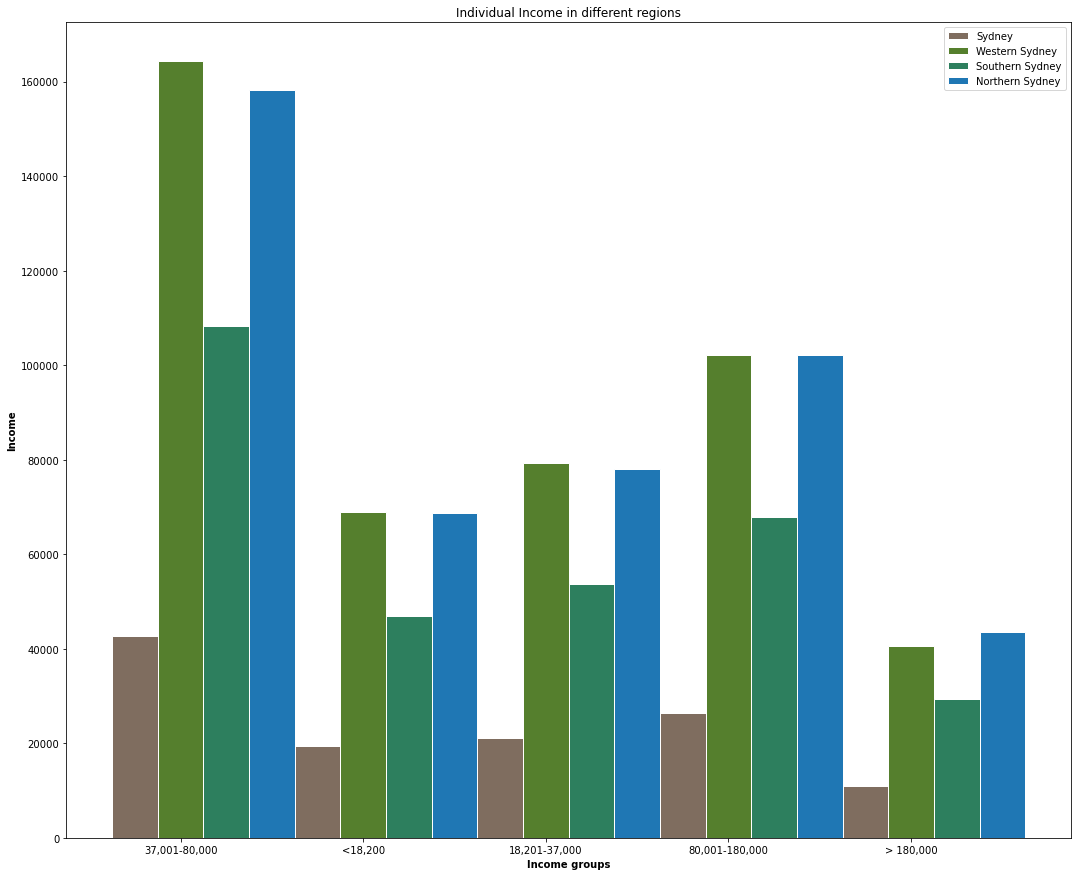

In [9]:
#Relationship between Region and total Income
Sydney = [Sydney1,Sydney2,Sydney3,Sydney4,Sydney5] 
WesternSydney = [WesternSydney1,WesternSydney2,WesternSydney3,WesternSydney4,WesternSydney5]
SouthernSydney=[SouthernSydney1,SouthernSydney2,SouthernSydney3,SouthernSydney4,SouthernSydney5]
NorthernSydney=[NorthernSydney1,NorthernSydney2,NorthernSydney3,NorthernSydney4,NorthernSydney5]

index = ['37,001-80,000','<18,200', '18,201-37,000','80,001-180,000', '> 180,000']


# set width of bar
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(Sydney))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

f, ax = plt.subplots(figsize=(18,15))
plt.bar(r1, Sydney,color='#7f6d5f', edgecolor='white', width=barWidth, label='var1')
plt.bar(r2, WesternSydney,color='#557f2d', edgecolor='white',width=barWidth, label='var2')
plt.bar(r3, SouthernSydney,color='#2d7f5e', edgecolor='white',width=barWidth, label='var3')
plt.bar(r4, NorthernSydney, edgecolor='white',width=barWidth, label='var4')

plt.legend(["Sydney", "Western Sydney","Southern Sydney","Northern Sydney"])

# Add xticks on the middle of the group bars
plt.xlabel('Income groups', fontweight='bold')
plt.ylabel('Income', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(Sydney))],index)
plt.title('Individual Income in different regions')

### Analysis
From the above graph we can clearly see that the Western and Northern Sydney has individuals with the highest income out of all the four regions. 
We can also see that highest number of individuals out of all regions fall within an income range of 37,001-80000.

### Barplot showing amount of people 

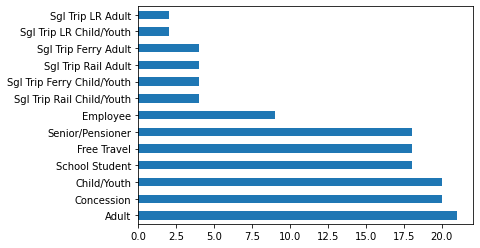

In [19]:
bplot = explorationdata['Individual'].value_counts()[:20].plot(kind='barh')

#### Analysis 
The biggest group of people who are using public transports are the Adults, with Child/Youths and concessions coming in next. School Students, Free  Travels, Seniors and pensioners next. 

### Barplot showing taps from each year ###

In [57]:
#Preparing barplot data for comparing taps throughout each year

#Creating lists for each years taps
Year2016 = {"July" : explorationdata["Jul-16"], "August" : explorationdata["Aug-16"], "September" : explorationdata["Sep-16"], "October" : explorationdata["Oct-16"], "November" : explorationdata["Nov-16"], "December" : explorationdata["Dec-16"]} 

Year2017 = {"January" : explorationdata["Jan-17"], "February" : explorationdata["Feb-17"], "March" : explorationdata["Mar-17"], "April" : explorationdata["Apr-17"], "May" : explorationdata["May-17"], "June" : explorationdata["Jun-17"], "July" : explorationdata["Jul-17"], "August" : explorationdata["Aug-17"], "September" : explorationdata["Sep-17"], "October" : explorationdata["Oct-17"], "November" : explorationdata["Nov-17"], "December" : explorationdata["Dec-17"]} 

Year2018 = {"January" : explorationdata["Jan-18"], "February" : explorationdata["Feb-18"], "March" : explorationdata["Mar-18"], "April" : explorationdata["Apr-18"], "May" : explorationdata["May-18"], "June" : explorationdata["Jun-18"], "July" : explorationdata["Jul-18"], "August" : explorationdata["Aug-18"], "September" : explorationdata["Sep-18"], "October" : explorationdata["Oct-18"], "November" : explorationdata["Nov-18"], "December" : explorationdata["Dec-18"]} 

Year2019 = {"January" : explorationdata["Jan-19"], "February" : explorationdata["Feb-19"], "March" : explorationdata["Mar-19"], "April" : explorationdata["Apr-19"], "May" : explorationdata["May-19"], "June" : explorationdata["Jun-19"], "July" : explorationdata["Jul-19"], "August" : explorationdata["Aug-19"], "September" : explorationdata["Sep-19"], "October" : explorationdata["Oct-19"], "November" : explorationdata["Nov-19"], "December" : explorationdata["Dec-19"]} 

Year2020 = {"January" : explorationdata["Jan-20"], "February" : explorationdata["Feb-20"], "March" : explorationdata["Mar-20"], "April" : explorationdata["Apr-20"], "May" : explorationdata["May-20"], "June" : explorationdata["Jun-20"], "July" : explorationdata["Jul-20"], "August" : explorationdata["Aug-20"], "September" : explorationdata["Sep-20"]}

#Making data for taps integers to be used in plots
Taps2016 = pd.DataFrame(Year2016).astype(str).astype(int)

Taps2017 = pd.DataFrame(Year2017).astype(str).astype(int)

Taps2018 = pd.DataFrame(Year2018).astype(str).astype(int)

Taps2019 = pd.DataFrame(Year2019).astype(str).astype(int)

Taps2020 = pd.DataFrame(Year2020).astype(str).astype(int)

#Creating Arrays for years and taps
years = []

years.append("2016")

years.append("2017")

years.append("2018")

years.append("2019")

years.append("2020")

taps = []

taps.append(Taps2016.values.sum())

taps.append(Taps2017.values.sum())

taps.append(Taps2018.values.sum())

taps.append(Taps2019.values.sum())

taps.append(Taps2020.values.sum())

#Final dataframe to contain data for years and taps

data = pd.DataFrame()

data["Years"] = years

data["Taps"] = taps

Text(0.5, 0, 'Taps (Millions)')

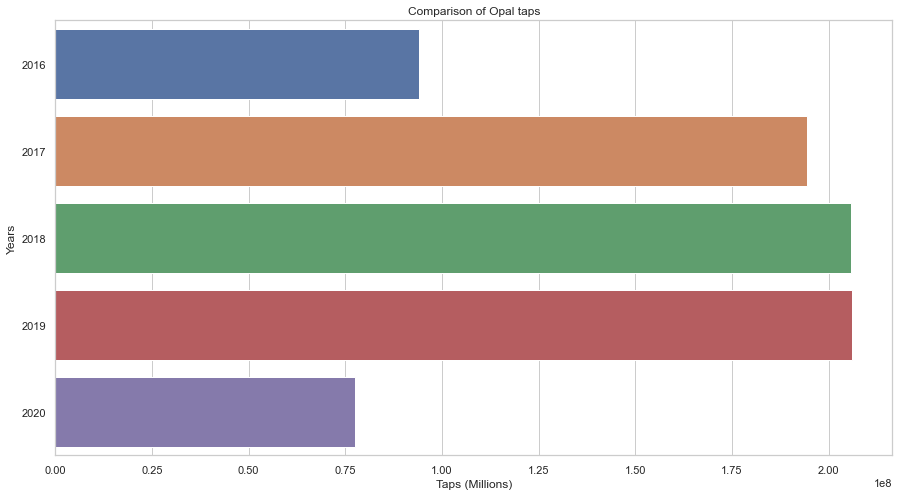

In [58]:
#Barplot

fig = plt.figure(figsize = (15, 8))

sns.set(style = "whitegrid")

plt.title("Comparison of Opal taps")

ax = sns.barplot(y = "Years", x = "Taps", data = data, orient = "h")

ax.set_ylabel(ylabel = "Years")

ax.set_xlabel(xlabel = "Taps (Millions)")

### Analysis ###

From the barplot presented it is evident that 2019 has the highest number of taps throughout all transport types in Sydney. In addition to this, the second highest number of taps can be seen in 2018 which is very close to 2019 in tap count. Both 2016 and 2020 have the lowest recorded taps. It is believed that data from these years have gaps, as they do not record certain months of the year, which results in a non-accurate representation of taps during these times. With this in mind, it is safe to assume that more data was collected for years 2017, 2018 and 2019 which resulted in their tap counts being greater.

### Relationship Between individual type and transport ###

<AxesSubplot:>

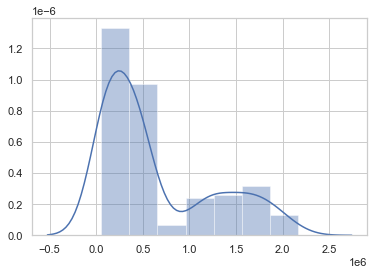

In [59]:
#Relationship between Adult and Type of Transport
Sydadult = explorationdata.loc[(explorationdata['Individual']=='Adult')]
Sydadult = Sydadult.set_index('Travel')
Sydadult = Sydadult.drop(columns =['Region', 'Individual', 'State/ Territory', 'Income 1', 'Income 2', 'Income 3', 'Income 4', 'Income 5'])
Sydadult = Sydadult.transpose()
sns.distplot(Sydadult.Bus)

<AxesSubplot:>

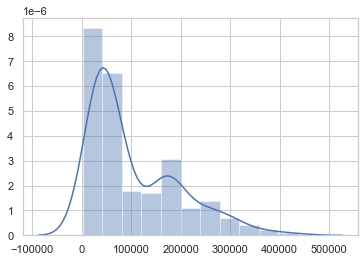

In [60]:
sns.distplot(Sydadult.Ferry)

<AxesSubplot:>

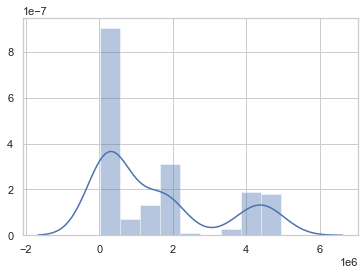

In [61]:
sns.distplot(Sydadult.Train)

<AxesSubplot:>

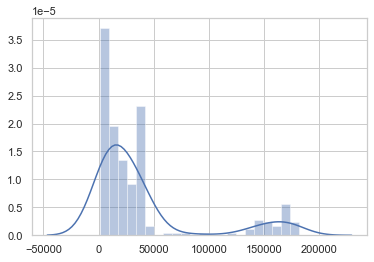

In [62]:
sns.distplot(Sydadult.Lightrail)

<AxesSubplot:>

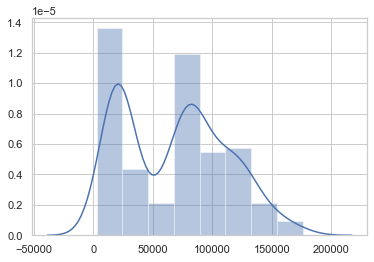

In [63]:
#Relationship between Child/Youth and Type of Transport
Sydchild = explorationdata.loc[(explorationdata['Individual']=='Child/Youth')]
Sydchild = Sydchild.set_index('Travel')
Sydchild = Sydchild.drop(columns =['Region', 'Individual', 'State/ Territory', 'Income 1', 'Income 2', 'Income 3', 'Income 4', 'Income 5'])
Sydchild = Sydchild.transpose()
sns.distplot(Sydchild.Bus)

<AxesSubplot:>

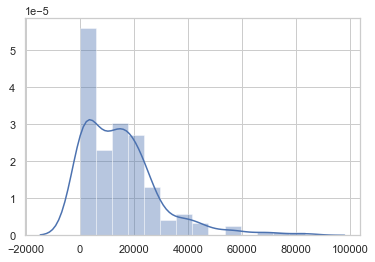

In [64]:
sns.distplot(Sydchild.Ferry)

<AxesSubplot:>

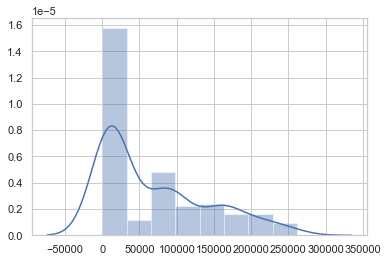

In [65]:
sns.distplot(Sydchild.Train)

<AxesSubplot:>

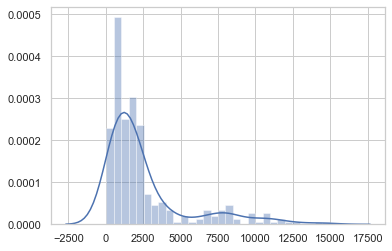

In [66]:
sns.distplot(Sydchild.Lightrail)

<AxesSubplot:>

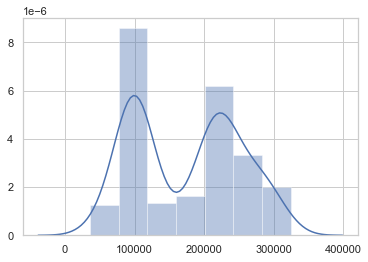

In [67]:
#Relationship between Senior/Pensioner and Type of Transport
Sydsenior = explorationdata.loc[(explorationdata['Individual']=='Senior/Pensioner')]
Sydsenior = Sydsenior.set_index('Travel')
Sydsenior = Sydsenior.drop(columns =['Region', 'Individual', 'State/ Territory', 'Income 1', 'Income 2', 'Income 3', 'Income 4', 'Income 5'])
Sydsenior = Sydsenior.transpose()
sns.distplot(Sydsenior.Bus)

<AxesSubplot:>

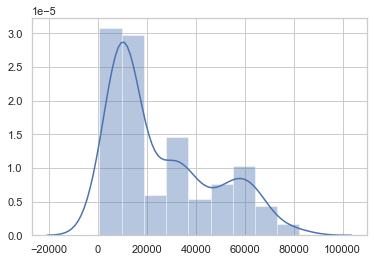

In [68]:
sns.distplot(Sydsenior.Ferry)

<AxesSubplot:>

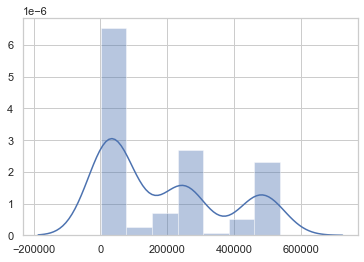

In [69]:
sns.distplot(Sydsenior.Train)

<AxesSubplot:>

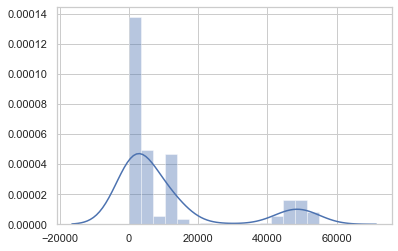

In [70]:
sns.distplot(Sydsenior.Lightrail)

### Analysis ###

After conducting histograms of the number of tap on and off based on the age group, it shows that Adult tend to use bus as their transportation while Child prefer to travel by train. Ferry remains the least-used type of transport and most of the passenger was in Senior/Pensioner group.

### Scatterplots for correlation ###

-0.0371986519235825

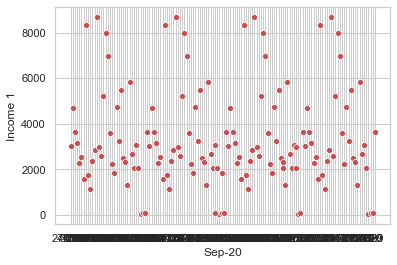

In [71]:
#Correlation between September (2020) and Income 1
sns.scatterplot("Sep-20", "Income 1", data = explorationdata, color = "r")
Year2020["September"].astype(int).corr(explorationdata["Income 1"].astype(int))

0.9605671723170234

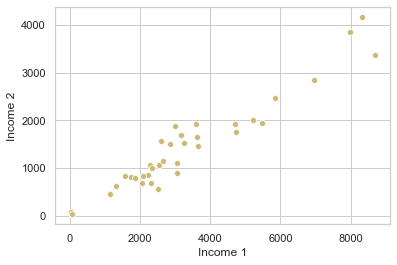

In [72]:
#Correlation between Income 1 and Income 2
sns.scatterplot("Income 1", "Income 2", data = explorationdata, color = "y")
explorationdata["Income 1"].astype(int).corr(explorationdata["Income 2"].astype(int))

0.9915173724198987

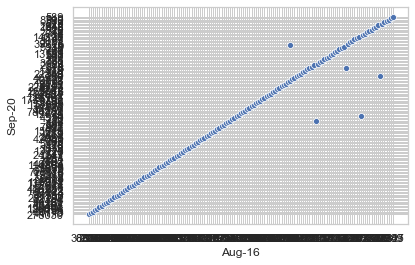

In [73]:
#Correlation between September (2020) and August (2016)

sns.scatterplot("Aug-16", "Sep-20", data = explorationdata)
Year2020["September"].astype(int).corr(Year2016["August"].astype(int))

### Analysis ###

From the following three scatterplots and correlations it is evident that the variables correlate highly when comparing variables from their specific data set. However, when comparing two variables each from a different dataset, there is a negative correlation.

## Linear Regression Model  for Trains, Ferries, Buses and Lightrails##

Using a linear regression model to predict taps for trains based on previous tap data and income of different individuals. Data for all tests have been split so that the test size is 0.20 and the training size is 0.80.

In [74]:
#Importing Linear Regression

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import math
from sklearn.metrics import max_error

In [75]:
#Linear Regression model to predict taps for trains based on previous tap data and income bracket.

#Initialising linear regression
clf = linear_model.LinearRegression()

#Initialising Variables
X = trainpop[["Jul-16", "Aug-16", "Sep-16","Oct-16", "Nov-16", "Dec-16", "Jan-17", "Feb-17", "Mar-17", "Apr-17", "May-17", "Jun-17", "Jul-17", "Aug-17", "Sep-17", "Oct-17", "Nov-17", "Dec-17", "Jan-18", "Feb-18", "Mar-18", "Apr-18", "May-18", "Jun-18", "Jul-18", "Aug-18", "Sep-18", "Oct-18", "Nov-18", "Dec-18", "Jan-19", "Feb-19", "Mar-19", "Apr-19", "May-19", "Jun-19", "Jul-19", "Aug-19", "Sep-19", "Oct-19", "Nov-19", "Dec-19", "Jan-20", "Feb-20", "Mar-20", "Apr-20", "May-20", "Jun-20", "Jul-20", "Aug-20", "Income 1", "Income 2", "Income 3", "Income 4", "Income 5"]]
y = trainpop[["Sep-20"]]

#Train Test Split for data with test size being 0.20 and training size being 0.80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Fitting Linear Regression Model
clf.fit(X_train, y_train)

#Predictions
y_prediction = clf.predict(X_test)

#Model Metrics
print("Model Output")
print("R^2 Score:", r2_score(y_test, y_prediction))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_prediction)))
print("Max Error:", max_error(y_test, y_prediction))
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Model Output
R^2 Score: 0.9994245264991392
RMSE: 2044.4861957097987
Max Error: 4332.19666965396
Coefficients: [[-0.06622748  0.03985178  0.02782428 -0.00611157  0.07816123 -0.03060032
   0.00307506  0.00241481  0.04324875 -0.00644864 -0.00439162  0.0128501
   0.0579069   0.06684208  0.03898597 -0.07945591 -0.0647712  -0.02541241
   0.00791891 -0.0250512   0.01908201 -0.03908268 -0.00869839 -0.0274691
  -0.11244718  0.03597581  0.0415662  -0.07743004 -0.01604351 -0.0378664
  -0.04989     0.04085037  0.02434336  0.1064428  -0.09924834  0.0141462
  -0.04643025 -0.00476594 -0.03566588 -0.01558466 -0.07508765  0.15840286
   0.10827117  0.17015397  0.11040577 -0.05965454  0.07079774  0.19777509
   0.22591397  0.27787288 -0.06435503  0.07299965  0.0052394   0.02585762
   0.06089123]]
Intercept: [-74.99658682]


In [76]:
#Linear Regression model to predict future taps for ferries based on previous tap data and income bracket.

#Initialising linear regression
clf = linear_model.LinearRegression()

#Initialising Variables
X = ferrypop[["Jul-16", "Aug-16", "Sep-16","Oct-16", "Nov-16", "Dec-16", "Jan-17", "Feb-17", "Mar-17", "Apr-17", "May-17", "Jun-17", "Jul-17", "Aug-17", "Sep-17", "Oct-17", "Nov-17", "Dec-17", "Jan-18", "Feb-18", "Mar-18", "Apr-18", "May-18", "Jun-18", "Jul-18", "Aug-18", "Sep-18", "Oct-18", "Nov-18", "Dec-18", "Jan-19", "Feb-19", "Mar-19", "Apr-19", "May-19", "Jun-19", "Jul-19", "Aug-19", "Sep-19", "Oct-19", "Nov-19", "Dec-19", "Jan-20", "Feb-20", "Mar-20", "Apr-20", "May-20", "Jun-20", "Jul-20", "Aug-20", "Income 1", "Income 2", "Income 3", "Income 4", "Income 5"]]
y = ferrypop[["Sep-20"]]

#Train Test Split for data with test size being 0.20 and training size being 0.80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Fitting Linear Regression Model
clf.fit(X_train, y_train)

#Predictions
y_prediction = clf.predict(X_test)

#Model Metrics
print("Model Output")
print("R^2 Score:", r2_score(y_test, y_prediction))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_prediction)))
print("Max Error:", max_error(y_test, y_prediction))
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Model Output
R^2 Score: 0.9156525307095851
RMSE: 378.7799535185857
Max Error: 712.985907248783
Coefficients: [[ 0.02715555  0.02578637  0.0616739   0.17915268 -0.13202089 -0.06449313
  -0.06970395 -0.07444007  0.05217306 -0.08032151  0.06225556  0.0364768
  -0.11473848  0.19081468 -0.16037158 -0.03989998  0.15892473 -0.02130864
   0.03805186  0.09422723 -0.06489998  0.02864265 -0.05715061 -0.03516526
   0.05588201  0.06343492  0.05668774 -0.13075963 -0.05797582 -0.07609525
  -0.02225008 -0.03603725 -0.10704316  0.10771902 -0.0256728  -0.0386455
  -0.01056697 -0.10919627 -0.21120586  0.16656266  0.03842634  0.27246621
   0.01500396 -0.00208617  0.1884751  -0.02898471 -0.00244583  0.40409713
   0.17804796  0.39938675  0.01966129 -0.05809512  0.07170713 -0.03481869
  -0.00631954]]
Intercept: [-15.3694133]


In [77]:
#Linear regression model to predict future taps for buses based on previous tap data and income bracket.

#Initialising linear regression
clf = linear_model.LinearRegression()

#Initialising Variables
X = buspop[["Jul-16", "Aug-16", "Sep-16","Oct-16", "Nov-16", "Dec-16", "Jan-17", "Feb-17", "Mar-17", "Apr-17", "May-17", "Jun-17", "Jul-17", "Aug-17", "Sep-17", "Oct-17", "Nov-17", "Dec-17", "Jan-18", "Feb-18", "Mar-18", "Apr-18", "May-18", "Jun-18", "Jul-18", "Aug-18", "Sep-18", "Oct-18", "Nov-18", "Dec-18", "Jan-19", "Feb-19", "Mar-19", "Apr-19", "May-19", "Jun-19", "Jul-19", "Aug-19", "Sep-19", "Oct-19", "Nov-19", "Dec-19", "Jan-20", "Feb-20", "Mar-20", "Apr-20", "May-20", "Jun-20", "Jul-20", "Aug-20", "Income 1", "Income 2", "Income 3", "Income 4", "Income 5"]]
y = buspop[["Sep-20"]]

#Train Test Split for data with test size being 0.20 and training size being 0.80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Fitting Linear Regression Model
clf.fit(X_train, y_train)

#Predictions
y_prediction = clf.predict(X_test)

#Model Metrics
print("Model Output")
print("R^2 Score:", r2_score(y_test, y_prediction))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_prediction)))
print("Max Error:", max_error(y_test, y_prediction))
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Model Output
R^2 Score: 0.9938788504091541
RMSE: 17454.169358206607
Max Error: 48174.84916549735
Coefficients: [[-0.00215975 -0.04224179  0.263341   -0.00154261 -0.07188659 -0.17521592
  -0.11259514 -0.08241422  0.04949914  0.09936674 -0.0849881  -0.11739512
   0.04363447  0.03016419  0.28310982 -0.0059329   0.04778076 -0.00368121
   0.05816011 -0.07523946 -0.15491054  0.0944597   0.00808712  0.01632008
   0.01533091 -0.00877863 -0.0172853  -0.03088854  0.03399     0.1651532
  -0.16746119  0.12679445 -0.05727105  0.10691106 -0.06239225 -0.04309215
  -0.13865682 -0.02336602 -0.0449659   0.01603432  0.13399159  0.00821191
  -0.09859896  0.03672263 -0.05209364  0.05445433  0.03791497  0.15329577
   0.40526449  0.49456203 -0.05526876  0.04570211  0.04474352 -0.00644092
   0.0691393 ]]
Intercept: [-48.97745919]


In [78]:
#Linear regression model to predict future taps for lightrails based on tap data and income bracket.

#Initialising linear regression
clf = linear_model.LinearRegression()

#Initialising Variables
X = lightrailpop[["Jul-16", "Aug-16", "Sep-16","Oct-16", "Nov-16", "Dec-16", "Jan-17", "Feb-17", "Mar-17", "Apr-17", "May-17", "Jun-17", "Jul-17", "Aug-17", "Sep-17", "Oct-17", "Nov-17", "Dec-17", "Jan-18", "Feb-18", "Mar-18", "Apr-18", "May-18", "Jun-18", "Jul-18", "Aug-18", "Sep-18", "Oct-18", "Nov-18", "Dec-18", "Jan-19", "Feb-19", "Mar-19", "Apr-19", "May-19", "Jun-19", "Jul-19", "Aug-19", "Sep-19", "Oct-19", "Nov-19", "Dec-19", "Jan-20", "Feb-20", "Mar-20", "Apr-20", "May-20", "Jun-20", "Jul-20", "Aug-20", "Income 1", "Income 2", "Income 3", "Income 4", "Income 5"]]
y = lightrailpop[["Sep-20"]]

#Train Test Split for data with test size being 0.20 and training size being 0.80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Fitting Linear Regression Model
clf.fit(X_train, y_train)

#Predictions
y_prediction = clf.predict(X_test)

#Model Metrics
print("Model Output")
print("R^2 Score:", r2_score(y_test, y_prediction))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_prediction)))
print("Max Error:", max_error(y_test, y_prediction))
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Model Output
R^2 Score: 0.9961992072576596
RMSE: 150.21982677116134
Max Error: 378.78326778294013
Coefficients: [[ 0.0967062  -0.13129869  0.01928864  0.06370164 -0.1489001   0.03042404
   0.01577158 -0.07880524 -0.11811204  0.06758134  0.1144071   0.0884747
  -0.11277494 -0.10702475  0.08657153  0.02982131 -0.06176163  0.00748476
   0.113161   -0.02787586  0.05082435  0.07579241 -0.02546376 -0.04643708
   0.07471535  0.02743753 -0.05653947 -0.00717386 -0.01086694  0.05693023
  -0.12768588  0.04354871 -0.00700644 -0.13704798 -0.04478009 -0.0610218
   0.05322843 -0.11299059  0.12923631  0.15385138 -0.05177046 -0.01068007
  -0.09380208  0.20242361  0.22096018 -0.02502637  0.03810736  0.06236164
   0.35571333  0.43076363 -0.03635975  0.03954309 -0.01698104  0.06935419
  -0.06392538]]
Intercept: [7.43301981]


## K Neighbors Classifier Model for Trains, Ferries, Buses and Lightrails ##

In [28]:
#Light rail and Population dataset

import numpy as np
from sklearn.model_selection import train_test_split

#Initialising Variables
X_lightrailpop=lightrailpop[['Jul-16', 'Aug-16', 'Sep-16', 'Oct-16',
       'Nov-16', 'Dec-16', 'Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17',
       'Jun-17', 'Jul-17', 'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17',
       'Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18',
       'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19',
       'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19',
       'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20',
       'May-20', 'Jun-20', 'Jul-20', 'Aug-20','Income 1','Income 2','Income 3','Income 4','Income 5']]
y_lightrailpop=lightrailpop[['Sep-20']]

#Train Test Split for data with test size being 0.20 and training size being 0.80
X_train, X_test, y_train, y_test = train_test_split(X_lightrailpop, y_lightrailpop, random_state=142,test_size=0.20)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

# Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Build a KNN classifier model
clf_knn = KNeighborsClassifier()

# Train the model with the training data
clf_knn.fit(X_train, y_train)

#Predictions
y_pred = clf_knn.predict(X_test)

#Model Metrics
accuracy_score=accuracy_score(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error:",mse)
print("Coefficients of determination(r^2):",r2)
print("Accuracy score:",accuracy_score)

X_train shape: (28, 55)
y_train shape: (28, 1)
X_test shape: (8, 55)
y_test shape: (8, 1)
Mean squared error: 92751597.125
Coefficients of determination(r^2): 0.40062366531766735
Accuracy score: 0.0


/Users/sidmoharir/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [29]:
from sklearn import metrics
#Train and population dataset

#Initialising Variables
X_trainpop=trainpop[['Jul-16', 'Aug-16', 'Sep-16', 'Oct-16',
       'Nov-16', 'Dec-16', 'Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17',
       'Jun-17', 'Jul-17', 'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17',
       'Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18',
       'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19',
       'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19',
       'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20',
       'May-20', 'Jun-20', 'Jul-20', 'Aug-20','Income 1','Income 2','Income 3','Income 4','Income 5']]
y_trainpop=trainpop[['Sep-20']]

#Train Test Split for data with test size being 0.20 and training size being 0.80
X_train, X_test, y_train, y_test = train_test_split(X_trainpop, y_trainpop, random_state=142,test_size=0.20)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

# Build a KNN classifier model
clf_knn = KNeighborsClassifier()

# Train the model with the training data
clf_knn.fit(X_train, y_train)

#Predictions
y_pred = clf_knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

#Model Metrics
r2=r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error:",mse)
print("Coefficients of determination(r^2):",r2)
print("Accuracy score:",accuracy_score)

X_train shape: (28, 55)
y_train shape: (28, 1)
X_test shape: (8, 55)
y_test shape: (8, 1)
Mean squared error: 55356388854.25
Coefficients of determination(r^2): 0.13343326705642744
Accuracy score: 0.0


/Users/sidmoharir/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [30]:
#Bus and population dataset

#Initialising Variables
X_buspop=buspop[['Jul-16', 'Aug-16', 'Sep-16', 'Oct-16',
       'Nov-16', 'Dec-16', 'Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17',
       'Jun-17', 'Jul-17', 'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17',
       'Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18',
       'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19',
       'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19',
       'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20',
       'May-20', 'Jun-20', 'Jul-20', 'Aug-20','Income 1','Income 2','Income 3','Income 4','Income 5']]
y_buspop=buspop[['Sep-20']]

#Train Test Split for data with test size being 0.20 and training size being 0.80
X_train, X_test, y_train, y_test = train_test_split(X_buspop, y_buspop, random_state=142,test_size=0.20)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

# Build a KNN classifier model
clf_knn = KNeighborsClassifier()

# Train the model with the training data
clf_knn.fit(X_train, y_train)

#Predictions
y_pred = clf_knn.predict(X_test)

#Model Metrics
metrics.accuracy_score(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error:",mse)
print("Coefficients of determination(r^2):",r2)
print("Accuracy score:",accuracy_score)

X_train shape: (28, 55)
y_train shape: (28, 1)
X_test shape: (8, 55)
y_test shape: (8, 1)
Mean squared error: 3566930788.625
Coefficients of determination(r^2): 0.49720544572490966
Accuracy score: 0.0


/Users/sidmoharir/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [31]:
#Ferry and population dataset

#Initialising Variables
X_ferrypop=ferrypop[['Jul-16', 'Aug-16', 'Sep-16', 'Oct-16',
       'Nov-16', 'Dec-16', 'Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17',
       'Jun-17', 'Jul-17', 'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17',
       'Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18',
       'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19',
       'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19',
       'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20',
       'May-20', 'Jun-20', 'Jul-20', 'Aug-20','Income 1','Income 2','Income 3','Income 4','Income 5']]
y_ferrypop=ferrypop[['Sep-20']]

#Train Test Split for data with test size being 0.20 and training size being 0.80
X_train, X_test, y_train, y_test = train_test_split(X_ferrypop, y_ferrypop,test_size=0.20, random_state=142)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

# Build a KNN classifier model
clf_knn = KNeighborsClassifier()

# Train the model with the training data
clf_knn.fit(X_train, y_train)

#Predictions
y_pred = clf_knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

#Predictions
r2=r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error:",mse)
print("Coefficients of determination(r^2):",r2)
print("Accuracy score:",accuracy_score)

X_train shape: (28, 55)
y_train shape: (28, 1)
X_test shape: (8, 55)
y_test shape: (8, 1)
Mean squared error: 145465697.0
Coefficients of determination(r^2): 0.3417697981615413
Accuracy score: 0.0


/Users/sidmoharir/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


### Model Conclusions ###

From the output results from all linear regression and K Nearest Nearest Neighbors classifier, it is evident that the models for predicting future opal taps based on previous taps and demographics data could not fit appropriately to obtain a valid answer.

* The research group believes that the data provided from both sets did not have associations which are highly correlated between each other. This was proven during data exploration, whereby it was evident from the correlation analysis and scatterplot visualisations that variables being compared between eachother from different data sets resulted in negative correlation.


* Following this, the group also believed that the model wasn't fitted appropriately during model design which resulted in predictions which were deemed innaccurate due to the evaluation metrics generated for each test performed.


* Furthermore, selected response and predicted variables for the model prediction is another reason as to why outputs for prediction resulted in predictions which couldn't allow for questions to be answered.

### Summary of evaluation metrics for both models ###

* RMSE/MSE values for both models were extremely high. This indicates that the data has been fit badly, resulting in accuracy being decreased for the model's predictions being incorrect.


* R^2 scores (Linear Regression): R^2 scores reached values close to 1 for linear regression models. Indicating that the model perfectly predicts data.


* R^2 scores (K-Neighbors Classifier Model): R^2 scores for K-Neighbors models were below 0.50. This indicates that less than 50% of variability could be explained, which thus indicates that the model couldn't predict the data well.